In [24]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [25]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [26]:
#Default theme
sns.set_theme(context='notebook',
              style='whitegrid',
              palette='rainbow',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [27]:
titanic = pd.read_csv('titanic.csv')
titanic.head().style.set_properties(
    **{
        'background-color': 'LightBlue',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.829200,nan,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.000000,nan,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.687500,nan,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.662500,nan,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.287500,nan,S


In [28]:
print('Shape of Titanic data set is :',titanic.shape)
print('Size of Titanic data set is  :',titanic.size)

Shape of Titanic data set is : (418, 12)
Size of Titanic data set is  : 5016


In [29]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


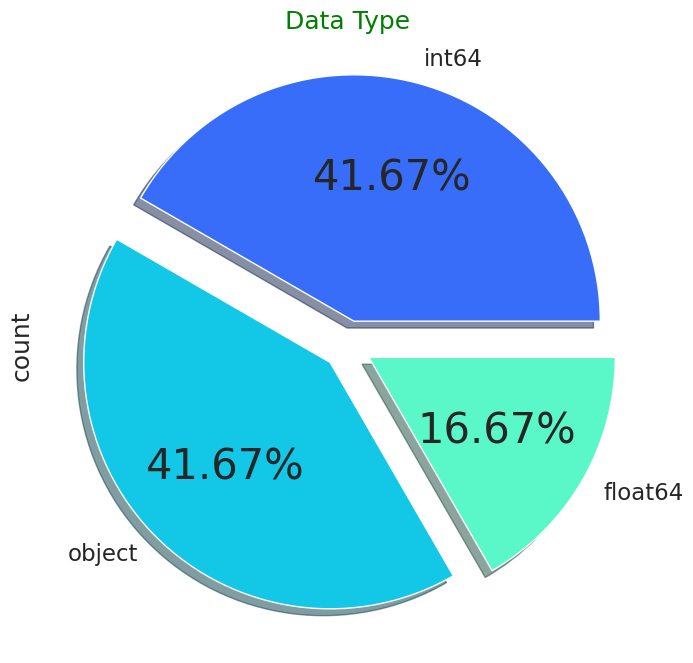

In [31]:
matplotlib.rcParams.update({'font.size': 30})

titanic.dtypes.value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                       autopct='%1.2f%%',
                                       shadow=True)
plt.title('Data Type',
          color='Green',
          loc='center',);

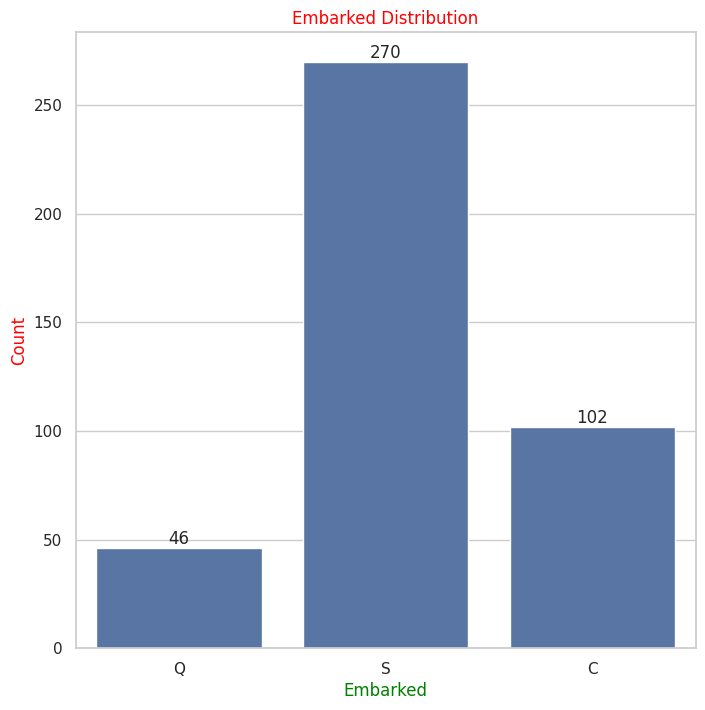

In [32]:
ax = sns.set(style="whitegrid")
ax = sns.countplot(data=titanic,x='Embarked');
ax.bar_label(ax.containers[0])

plt.title('Embarked Distribution',color='Red',loc='center');
plt.xlabel('Embarked',color='Green',loc='center')
plt.ylabel('Count',color='Red',loc='center');

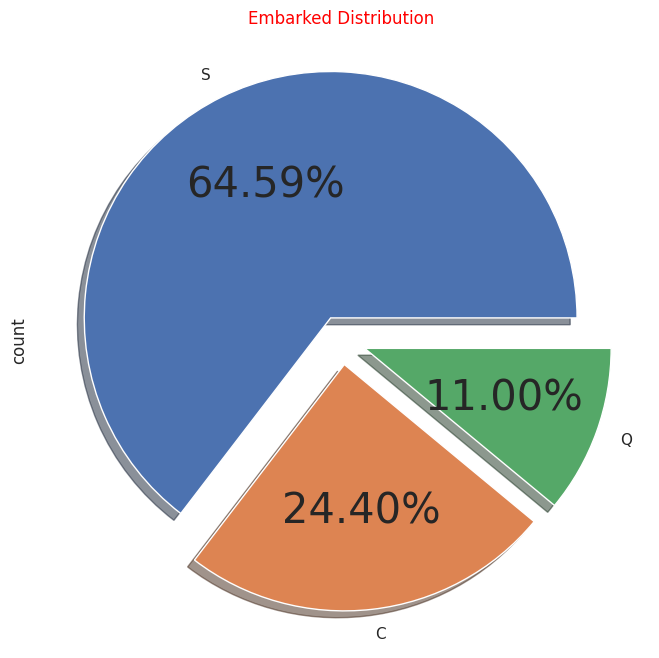

In [33]:
matplotlib.rcParams.update({'font.size': 30})
titanic['Embarked'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Embarked Distribution',color='Red',loc='center');

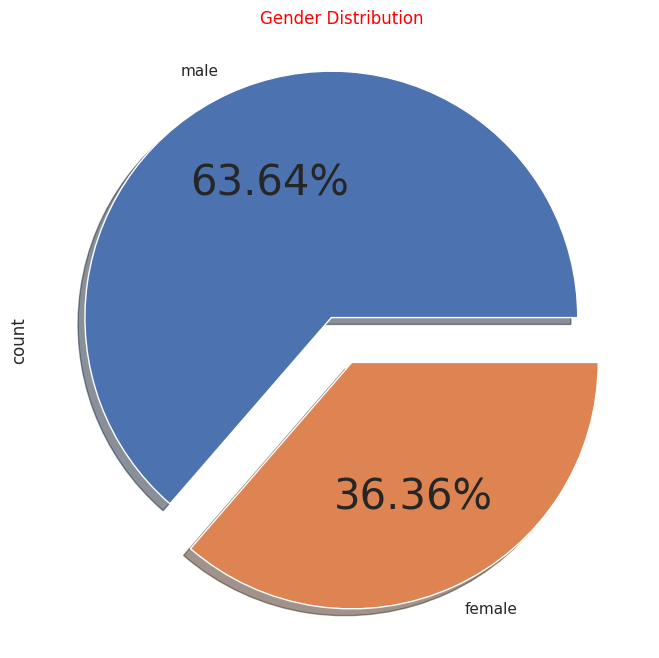

In [34]:
matplotlib.rcParams.update({'font.size': 30})
titanic['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Gender Distribution',color='Red',loc='center');

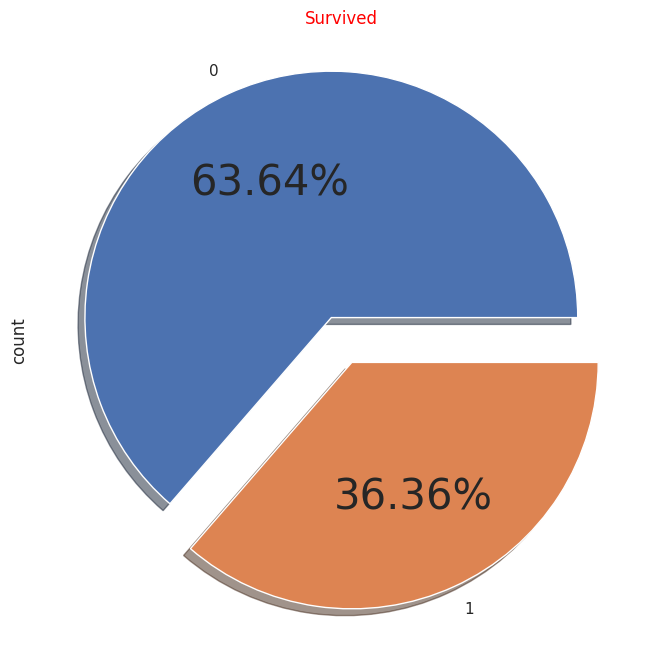

In [35]:
matplotlib.rcParams.update({'font.size': 30})
titanic['Survived'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Survived',color='Red',loc='center');

In [37]:
label_enc = LabelEncoder()
titanic['Sex'] = label_enc.fit_transform(titanic['Sex'])  # Male: 1, Female: 0
titanic['Embarked'] = label_enc.fit_transform(titanic['Embarked'])

In [43]:
# titanic = titanic.drop(columns="Name")
# titanic = titanic.drop(columns="Ticket")
titanic = titanic.drop(columns="Cabin")


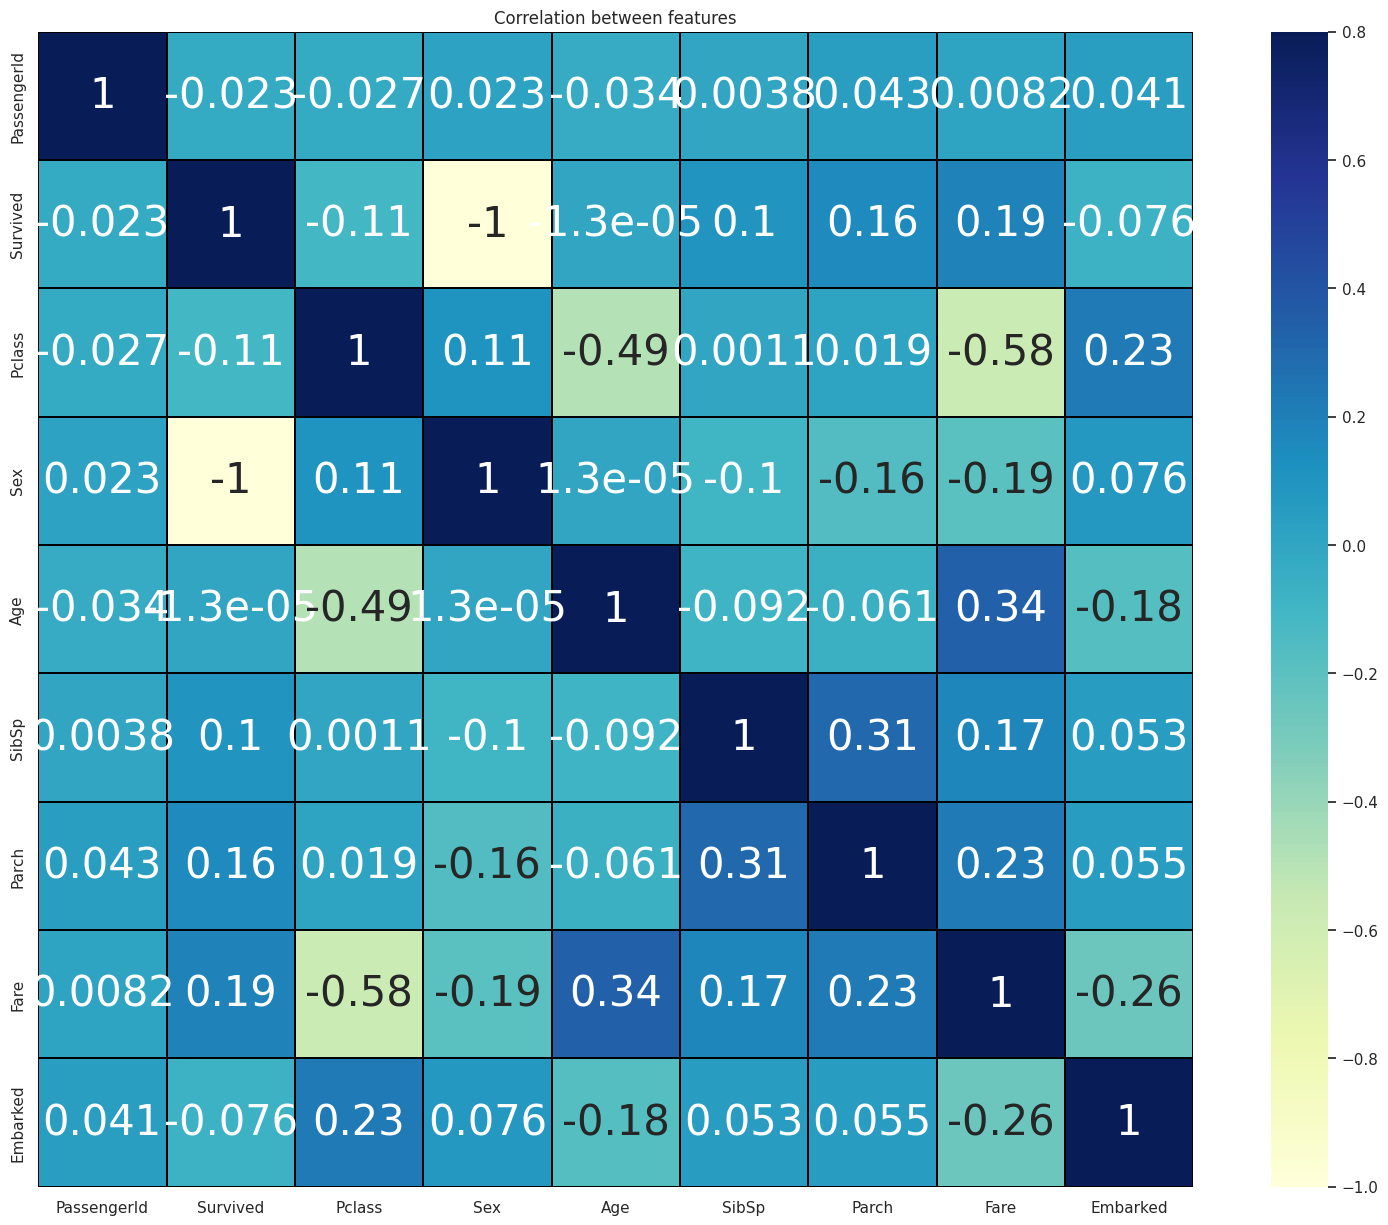

In [44]:
corr=titanic.corr()#["Survived"]
plt.figure(figsize=(20, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

In [45]:
# correlation heatmap of higly correlated features with SalePrice

hig_corr = titanic.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Fare"]) >= 0.25]
hig_corr_features

Index(['Pclass', 'Age', 'Fare', 'Embarked'], dtype='object')

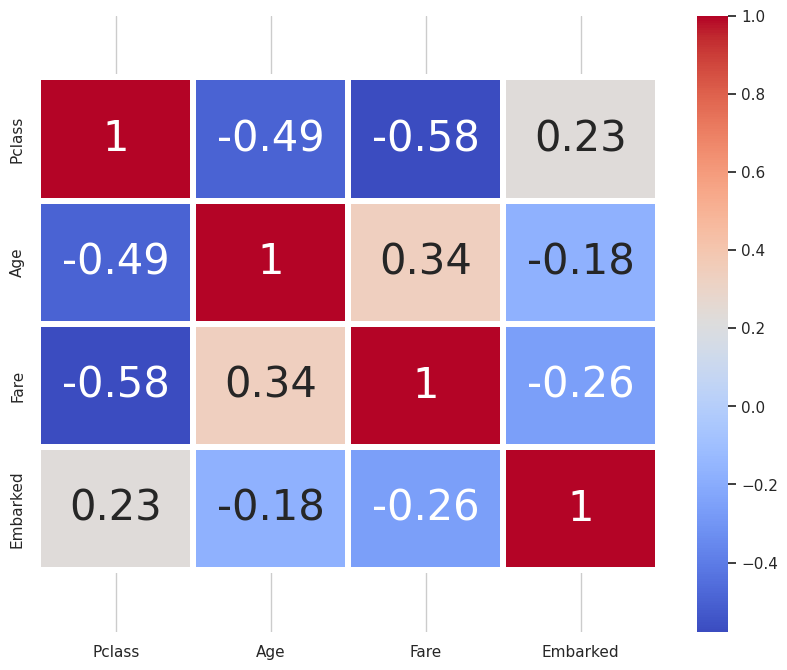

In [46]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(titanic[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)
# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

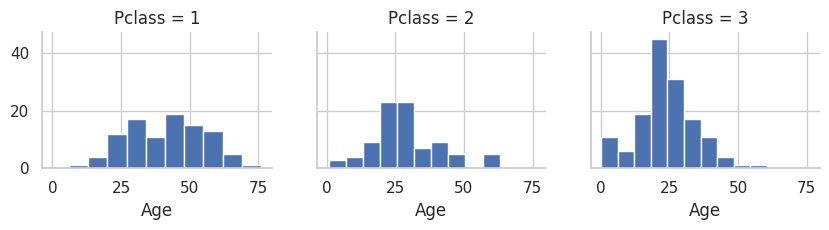

In [47]:
g = sns.FacetGrid(titanic, col="Pclass")
g = g.map(plt.hist, "Age")

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:40px; color:Blue">Methods to find Missing Values </h1>

In [48]:
def missing_value (df):
    missing_Number = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) !=0]
    missing_percent=round((df.isnull().sum()/df.isnull().count())*100,2)[round((df.isnull().sum()/df.isnull().count())*100,2) !=0]
    missing = pd.concat([missing_Number,missing_percent],axis=1,keys=['Missing Number','Missing Percentage'])
    return missing

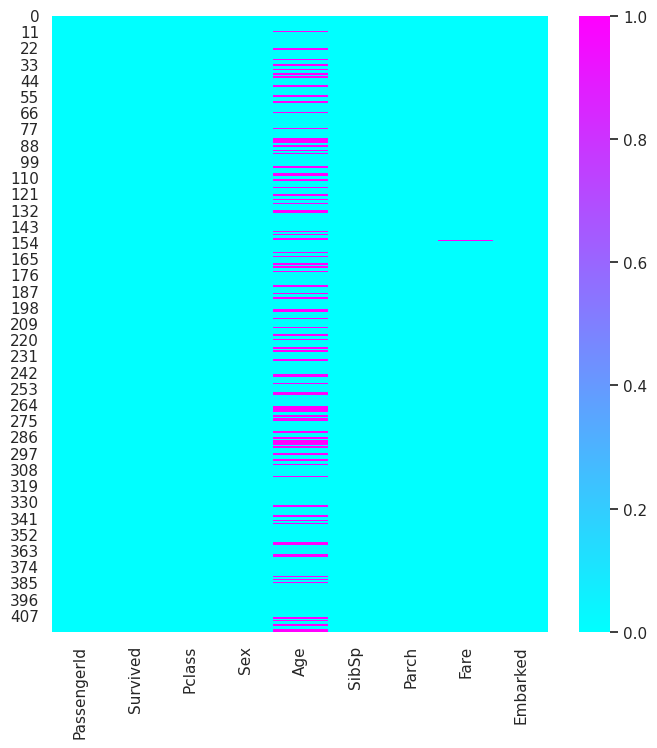

In [51]:
sns.heatmap(titanic.isnull(),cmap='cool');

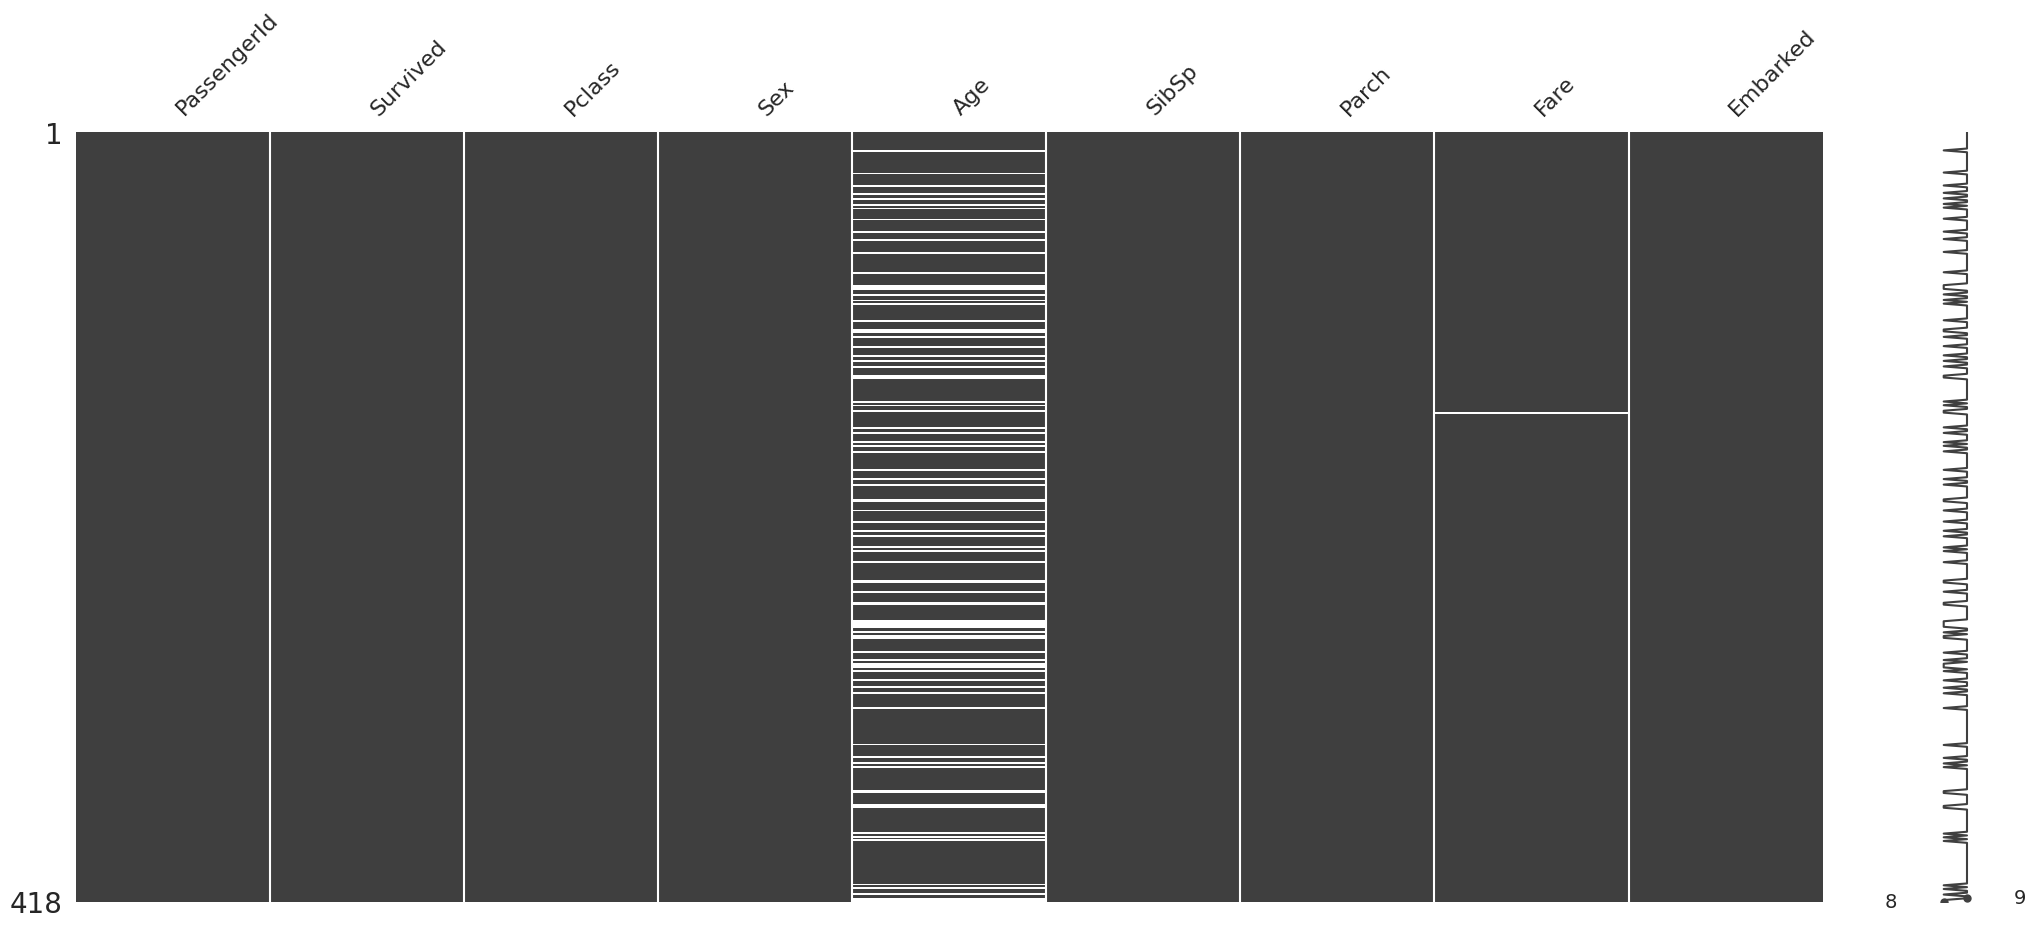

In [52]:
import missingno as msno
msno.matrix(titanic)
plt.show()

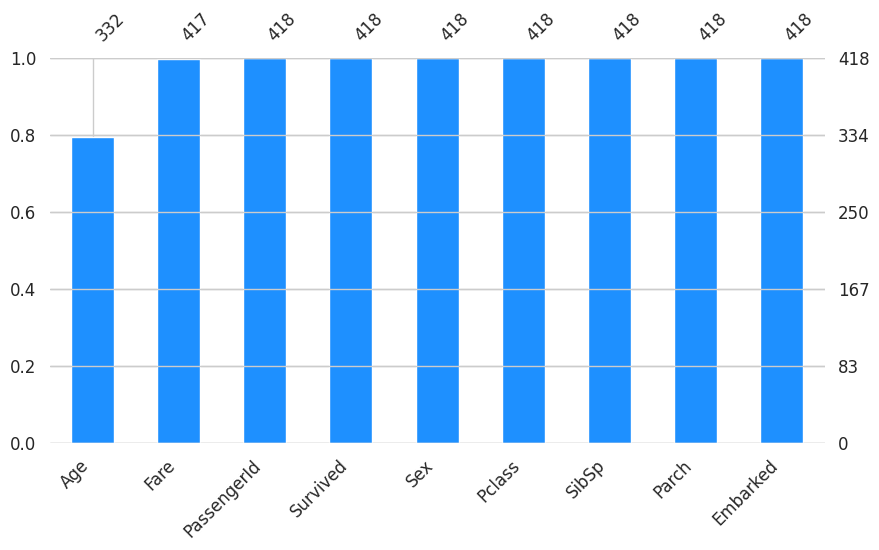

In [53]:
import missingno
missingno.bar(titanic, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

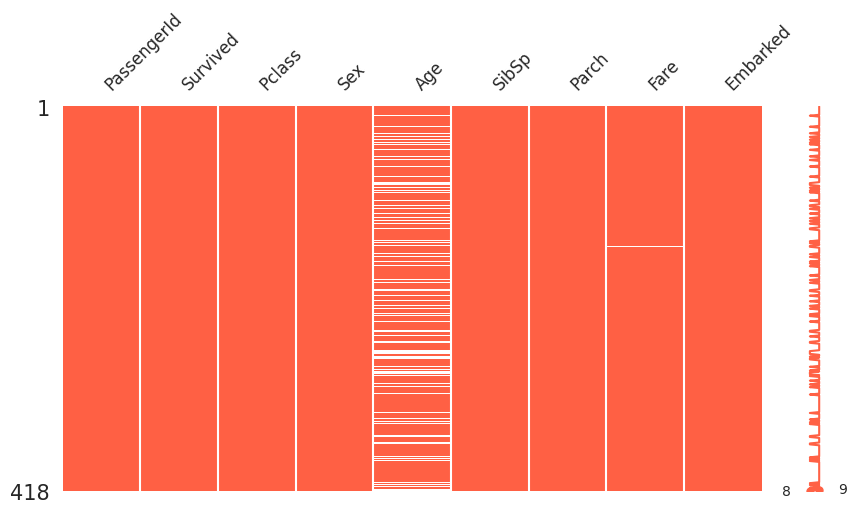

In [54]:
missingno.matrix(titanic, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:40px; color:blue"> Feature Engineering </h1>
<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> Filling/Removing Missing Values </h2>

In [56]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [57]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [58]:
titanic['Embarked'] = titanic['Embarked'].fillna(method='bfill')

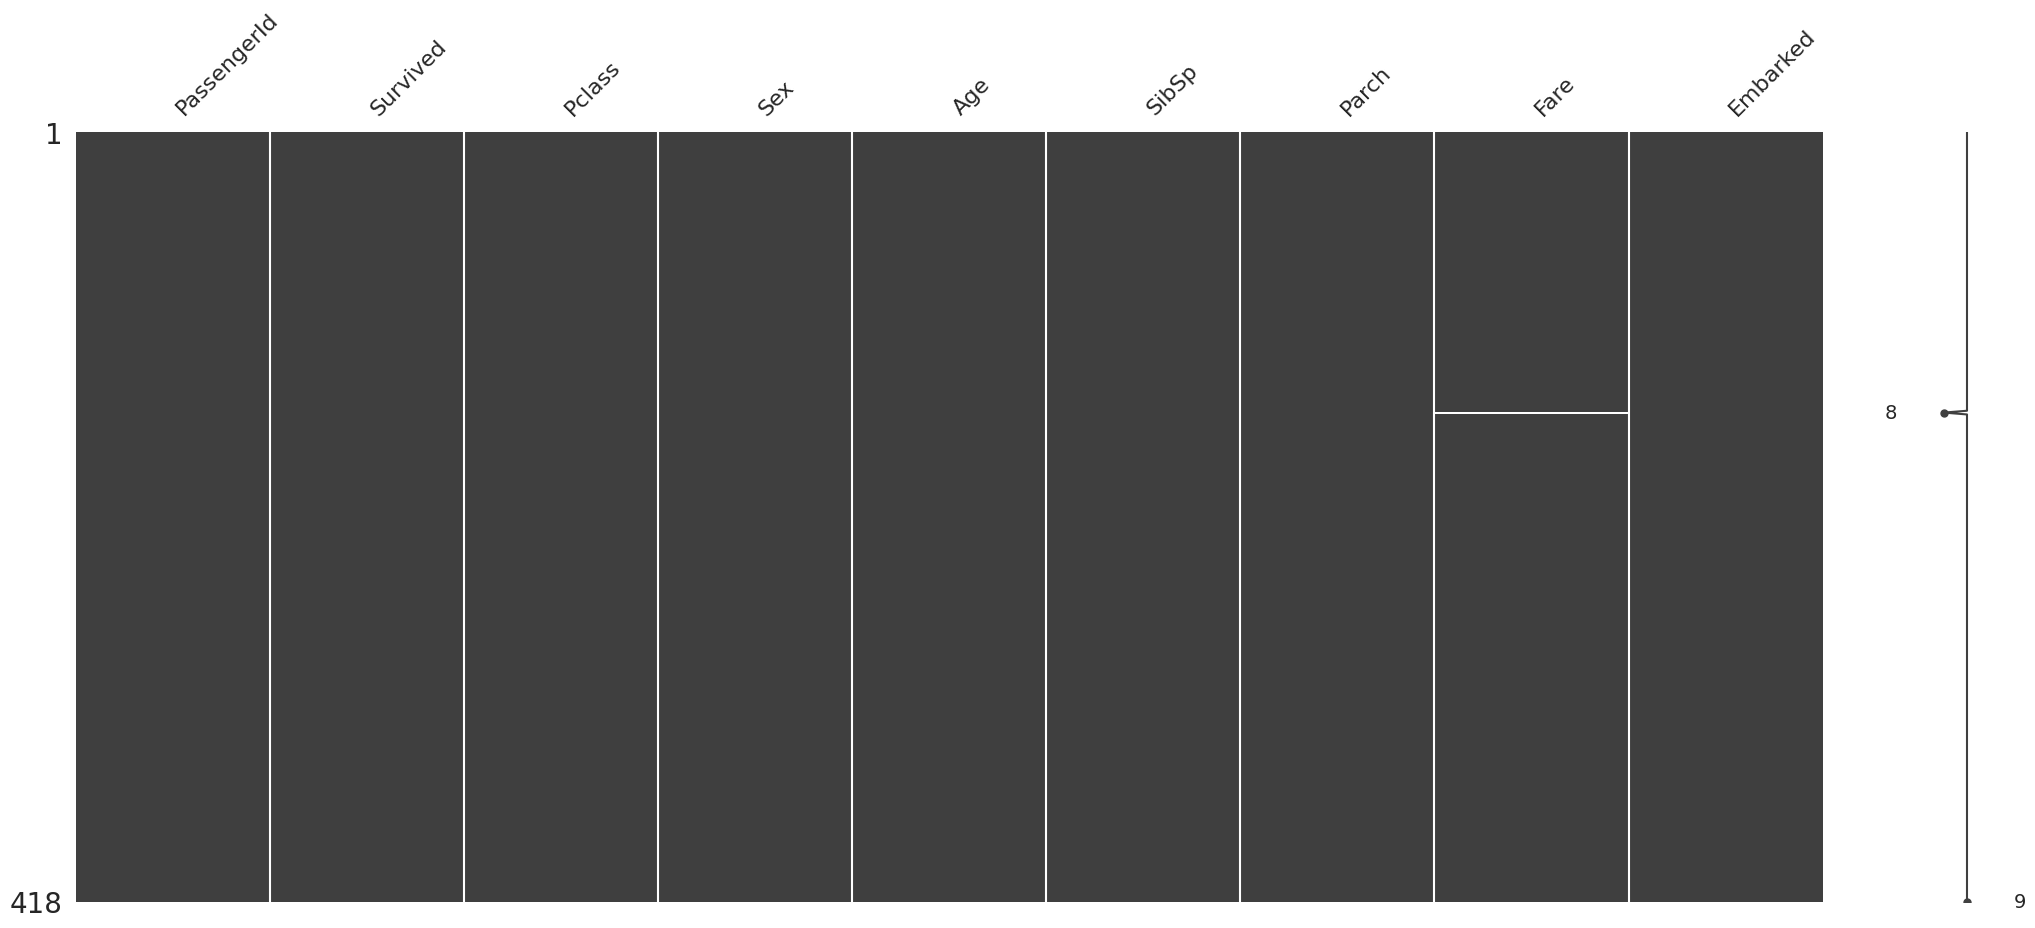

In [60]:
import missingno as msno
msno.matrix(titanic)
plt.show()

In [61]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [64]:
titanic = titanic.fillna(titanic["Fare"].mean())

<font color="Green" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">All the Missing Value is Filled/Removed</font>

In [67]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.5,0,0,7.8292,1
1,893,1,3,0,47.0,1,0,7.0000,2
2,894,0,2,1,62.0,0,0,9.6875,1
3,895,0,3,1,27.0,0,0,8.6625,2
4,896,1,3,0,22.0,1,1,12.2875,2


<font color="Indigo" size=+1.5 face="Lucida Calligraphy"><div style="text-align: justify">Categorical feature (Sex & Embarked) is converted into numerical feature by using pandas dummy method</font>

In [68]:
titanic = pd.get_dummies(titanic,columns=['Sex','Embarked'],drop_first=True)
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_1,Embarked_1,Embarked_2
0,892,0,3,34.5,0,0,7.8292,True,True,False
1,893,1,3,47.0,1,0,7.0000,False,False,True
2,894,0,2,62.0,0,0,9.6875,True,True,False
3,895,0,3,27.0,0,0,8.6625,True,False,True
4,896,1,3,22.0,1,1,12.2875,False,False,True


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> Train Test Split </h2>

In [69]:
X = titanic.drop(['Survived'],axis=1) 
y = titanic['Survived']

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> Standardizing the data</h2>

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [72]:
display(X_train.head())
display(X_test.head())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_1,Embarked_1,Embarked_2
0,-1.519844,-1.485927,-0.648907,-0.490615,0.610805,0.418126,-1.318220,-0.347571,-1.344144
1,-0.806757,0.871791,-0.918932,-0.490615,-0.435395,-0.507911,-1.318220,2.877113,-1.344144
2,1.562004,-1.485927,-0.648907,-0.490615,0.610805,0.374459,-1.318220,-0.347571,-1.344144
3,-0.585454,0.871791,-1.574708,4.829691,1.657005,0.162826,-1.318220,-0.347571,0.743968
4,0.004687,-0.307068,-1.034657,-0.490615,-0.435395,0.613181,0.758599,-0.347571,0.743968


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_1,Embarked_1,Embarked_2
0,-1.282149,0.871791,-1.574708,3.765630,0.610805,-0.138117,0.758599,2.877113,-1.344144
1,0.225990,-1.485927,1.356995,0.573446,-0.435395,1.170623,-1.318220,-0.347571,-1.344144
2,0.103044,-1.485927,1.742746,-0.490615,-0.435395,-0.166547,-1.318220,-0.347571,-1.344144
3,1.348898,0.871791,-0.648907,1.637507,-0.435395,-0.484560,-1.318220,-0.347571,0.743968
4,-0.290383,-0.307068,-0.803207,-0.490615,-0.435395,-0.009020,-1.318220,-0.347571,0.743968


<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:40px; color:Blue">Model Implementation</h1>

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> LogisticRegression</h2>

In [73]:
from sklearn.metrics import accuracy_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",log_train)
print("Model Accuracy Score :",log_accuracy)

Training Accuracy    : 100.0
Model Accuracy Score : 100.0


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> Support Vector Machines</h2>

In [74]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",svc_train)
print("Model Accuracy Score  :",svc_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 98.81


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> KNeighborsClassifier</h2>

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",knn_train)
print("Model Accuracy Score  :",knn_accuracy)

Training Accuracy     : 99.1
Model Accuracy Score  : 100.0


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> GaussianNB</h2>

In [76]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)

gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)
gaussian_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",gaussian_train)
print("Model Accuracy Score  :",gaussian_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 100.0


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> Perceptron</h2>

In [77]:
# Perceptron

from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)


perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",perceptron_train)
print("Model Accuracy Score :",perceptron_accuracy)

Training Accuracy    : 100.0
Model Accuracy Score : 100.0


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> LinearSVC</h2>

In [78]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)

linear_svc_train = round(linear_svc.score(X_train, y_train) * 100, 2)
linear_svc_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",linear_svc_train)
print("Model Accuracy Score :",linear_svc_accuracy)

Training Accuracy    : 100.0
Model Accuracy Score : 100.0


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> SGDClassifier</h2>

In [79]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd_train = round(sgd.score(X_train, y_train) * 100, 2)
sgd_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",sgd_train)
print("Model Accuracy Score  :",sgd_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 100.0


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> DecisionTreeClassifier</h2>

In [80]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
Y_pred = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",decision_train)
print("Model Accuracy Score  :",decision_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 100.0


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> RandomForestClassifier</h2>

In [81]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",random_forest_train)
print("Model Accuracy Score  :",random_forest_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 100.0


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> MLPClassifier</h2>

In [82]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
Y_pred = mlp.predict(X_test)
mlp.score(X_train, y_train)


mlp_train = round(mlp.score(X_train, y_train) * 100, 2)
mlp_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",mlp_train)
print("Model Accuracy Score  :",mlp_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 100.0


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> XGBClassifier</h2>

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> Comparing Models</h2>

In [84]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'KNN', 'Logistic Regression',
        'Random Forest',  'Perceptron',
        'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree',
        'GaussianNB', 'MLPClassifier'
    ],
    'Training Accuracy': [
        log_train, svc_train, knn_train, gaussian_train, perceptron_train,
        linear_svc_train, sgd_train, decision_train, random_forest_train,
        mlp_train
    ],
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, knn_accuracy, gaussian_accuracy, perceptron_accuracy,
        linear_svc_accuracy, sgd_accuracy, decision_accuracy, random_forest_accuracy,
        mlp_accuracy
    ]
})

In [85]:
models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
0,Support Vector Machines,100.0,100.00
1,KNN,100.0,98.81
3,Random Forest,100.0,100.00
4,Perceptron,100.0,100.00
5,Stochastic Gradient Decent,100.0,100.00
6,Linear SVC,100.0,100.00
8,GaussianNB,100.0,100.00
7,Decision Tree,100.0,100.00
9,MLPClassifier,100.0,100.00
2,Logistic Regression,99.1,100.00


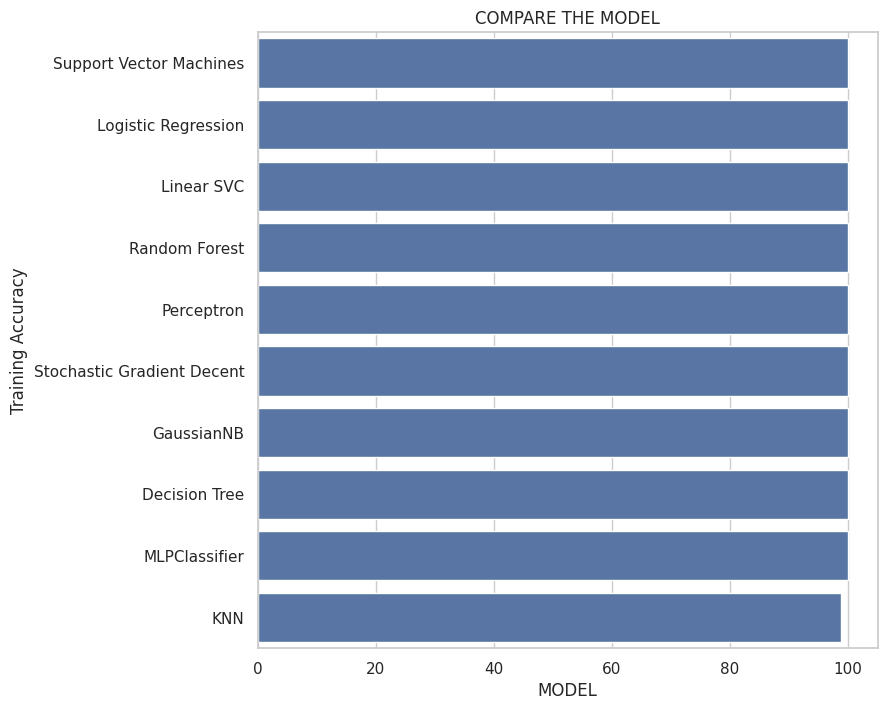

In [87]:
models=models.sort_values(by='Model Accuracy Score',ascending=False)[:20]

sns.barplot(y= 'Model', x= 'Model Accuracy Score', data= models)
plt.title('COMPARE THE MODEL')
plt.xlabel('MODEL')
plt.ylabel('Training Accuracy');


In [88]:
from sklearn.ensemble import RandomForestClassifier

y = titanic["Survived"]

features = ["Pclass", "SibSp", "Parch"]
X = pd.get_dummies(titanic[features])
X_test = pd.get_dummies(titanic[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)


output = pd.DataFrame({'PassengerId': titanic.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
